# 課題
## 多層パーセプトロンで非線形の識別境界を引く
- 層の数を変えた時の違いを見る

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Activation
sns.set()

In [3]:
def create_data(mean1, sigma1, mean2, sigma2, size, rate):
    sample1_1 = np.random.multivariate_normal(mean1, sigma1, int((size * rate) / 2))
    sample1_2 = np.random.multivariate_normal(-mean1, sigma1, int((size * rate) / 2))
    sample1 = np.vstack((sample1_1, sample1_2))
    class1 = np.ones(sample1.shape[0])

    sample2_1 = np.random.multivariate_normal(mean2, sigma2, int(size * (1 - rate) / 2))
    sample2_2 = np.random.multivariate_normal(-mean2, sigma2, int(size * (1 - rate) / 2))
    sample2 = np.vstack((sample2_1, sample2_2))
    class2 = np.zeros(sample2.shape[0])

    X = np.vstack((sample1, sample2))
    y = np.hstack((class1, class2))
    return sample1, sample2, X, y

In [4]:
class MultiLayerPerceptron:
    def __init__(self):
        self.model = Sequential()

    def build_layers(self, input_dim, unit_count, hidden_layer):
        self.model.add(Dense(unit_count, input_dim=input_dim, activation='relu'))
        self.model.add(Activation('relu'))
    
        for i in range(hidden_layer):
            self.model.add(Dense(unit_count))
            self.model.add(Activation('relu'))
    
        self.model.add(Dense(1))
        self.model.add(Activation('sigmoid'))
    
        self.model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    def fit(self, X, y, epochs):
        self.model.fit(X, y, epochs=epochs)
    
    def predict(self, X):
        return self.model.predict(X)

In [5]:
def plot_decision_surface(model, X, title):
    x1 = np.linspace(X[:, 0].min(), X[:, 0].max(), (X[:, 0].max() - X[:, 0].min()) * 3)
    x2 = np.linspace(X[:, 1].min(), X[:, 1].max(), (X[:, 1].max() - X[:, 1].min()) * 3)
    x1_mesh, x2_mesh = np.meshgrid(x1, x2)
    predict = model.predict(np.vstack((x1_mesh.flatten(), x2_mesh.flatten())).T)
    predict = predict.reshape(x1_mesh.shape)
    plt.figure(figsize=(10, 8))
    plt.scatter(class1[:, 0], class1[:, 1], s=15)
    plt.scatter(class2[:, 0], class2[:, 1], s=15)
    plt.title(title)
    plt.contour(x1_mesh, x2_mesh, predict, levels=[0.5])

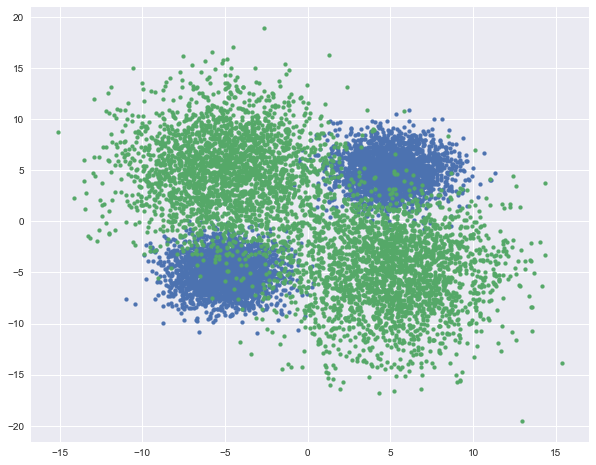

In [6]:
mean1 = np.array([5, 5])
sigma1 = np.array([[3, 0], [0, 3]])
mean2 = np.array([5, -5])
sigma2 = np.array([[10, 0], [0, 15]])
c1_rate = 0.5
class1, class2, X, y = create_data(mean1, sigma1, mean2, sigma2, 10000, c1_rate)
plt.figure(figsize=(10, 8))
plt.scatter(class1[:, 0], class1[:, 1], s=15)
plt.scatter(class2[:, 0], class2[:, 1], s=15)

Epoch 1/20
10000/10000 [==============================] - 1s 137us/step - loss: 0.4882 - acc: 0.8368
Epoch 2/20
10000/10000 [==============================] - 1s 61us/step - loss: 0.1664 - acc: 0.9413
Epoch 3/20
10000/10000 [==============================] - 1s 61us/step - loss: 0.1445 - acc: 0.9443
Epoch 4/20
10000/10000 [==============================] - 1s 60us/step - loss: 0.1392 - acc: 0.9483
Epoch 5/20
10000/10000 [==============================] - 1s 69us/step - loss: 0.1369 - acc: 0.9468
Epoch 6/20
10000/10000 [==============================] - 1s 61us/step - loss: 0.1351 - acc: 0.9479
Epoch 7/20
10000/10000 [==============================] - 1s 62us/step - loss: 0.1344 - acc: 0.9490
Epoch 8/20
10000/10000 [==============================] - 1s 62us/step - loss: 0.1337 - acc: 0.9500
Epoch 9/20
10000/10000 [==============================] - 1s 62us/step - loss: 0.1335 - acc: 0.9501
Epoch 10/20
10000/10000 [==============================] - 1s 64us/step - loss: 0.1327 - acc: 0.950

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


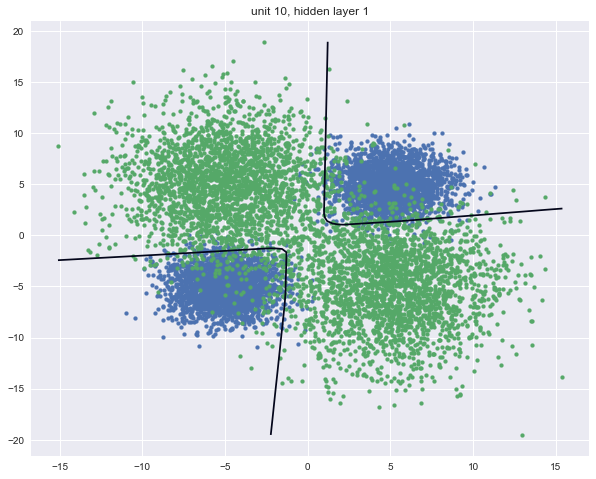

In [7]:
model1 = MultiLayerPerceptron()
model1.build_layers(2, 10, 1)
model1.fit(X, y, epochs=20)

plot_decision_surface(model1, X, 'unit 10, hidden layer 1')

Epoch 1/20
10000/10000 [==============================] - 5s 468us/step - loss: 0.3136 - acc: 0.8782
Epoch 2/20
10000/10000 [==============================] - 2s 164us/step - loss: 0.1496 - acc: 0.9473
Epoch 3/20
10000/10000 [==============================] - 2s 164us/step - loss: 0.1406 - acc: 0.9499
Epoch 4/20
10000/10000 [==============================] - 2s 174us/step - loss: 0.1428 - acc: 0.9494
Epoch 5/20
10000/10000 [==============================] - 2s 169us/step - loss: 0.1360 - acc: 0.9511
Epoch 6/20
10000/10000 [==============================] - 2s 171us/step - loss: 0.1376 - acc: 0.9493
Epoch 7/20
10000/10000 [==============================] - 2s 172us/step - loss: 0.1364 - acc: 0.9504
Epoch 8/20
10000/10000 [==============================] - 2s 170us/step - loss: 0.1336 - acc: 0.9505
Epoch 9/20
10000/10000 [==============================] - 2s 171us/step - loss: 0.1370 - acc: 0.9515
Epoch 10/20
10000/10000 [==============================] - 2s 171us/step - loss: 0.1327 - a

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  This is separate from the ipykernel package so we can avoid doing imports until


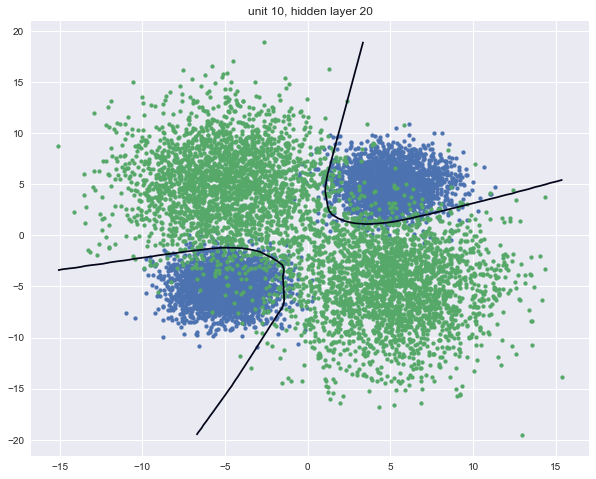

In [8]:
model2 = MultiLayerPerceptron()
model2.build_layers(2, 10, 20)
model2.fit(X, y, epochs=20)

plot_decision_surface(model2, X, 'unit 10, hidden layer 20')